In [1]:
import torch
from dataset import get_loaders
from config import read_config
from model import create_model

device = "cuda"
configs = read_config()
_, _, mix_train_set, mix_val_set, train_set, val_set = get_loaders(configs, device)
model, _ = create_model('rank')

In [2]:
import os
from sklearn.metrics import accuracy_score, f1_score

list_ckpt_path = os.listdir("/home2/havt/emotion_intensity")
list_ckpt_path = [ckpt_path for ckpt_path in list_ckpt_path if ckpt_path.endswith(".pt")]
list_ckpt_path

['rank_model_0.pt',
 'rank_model_5.pt',
 'rank_model_10.pt',
 'rank_model_15.pt',
 'rank_model_20.pt',
 'rank_model_25.pt',
 'rank_model_30.pt',
 'rank_model_35.pt',
 'rank_model_40.pt',
 'rank_model_45.pt',
 'rank_model_50.pt',
 'rank_model_55.pt',
 'rank_model_60.pt',
 'rank_model_65.pt',
 'rank_model_70.pt',
 'rank_model_75.pt',
 'rank_model_80.pt',
 'rank_model_85.pt',
 'rank_model_90.pt',
 'rank_model_95.pt',
 'rank_model_100.pt']

In [3]:
# _ds = mix_train_set

# rs = []
# for ckpt_fname in list_ckpt_path:
#     print(ckpt_fname)
#     ckpt = torch.load("/home2/havt/emotion_intensity/" + ckpt_fname, map_location=device)
#     model.load_state_dict(ckpt['state_dict'])
#     model.to(device)
#     model.eval()
    
#     emo_lbs = []
#     emo_preds = []
#     for idx in range(len(_ds.wrapped_ds)):
#         sample = _ds.get_one_fn(idx)
#         if "speaker" in sample and sample['speaker'] != 0:
#             continue
#         mels = torch.from_numpy(sample["mel"]).unsqueeze(0)
#         emo = sample["emotion"]
#         mels = mels.to(device)
        
#         i, h, r = model(mels)
        
#         emo_lbs.append(emo)
#         emo_preds.append(torch.argmax(h, dim=1).item())
#     acc = accuracy_score(emo_lbs, emo_preds)
#     f1 = f1_score(emo_lbs, emo_preds, average=None)
#     rs.append((ckpt_fname, acc, f1))
#     msg2 = f'Validation Accuracy: {acc}, F1: {f1}'
#     print(msg2)

rank_model_0.pt


KeyboardInterrupt: 

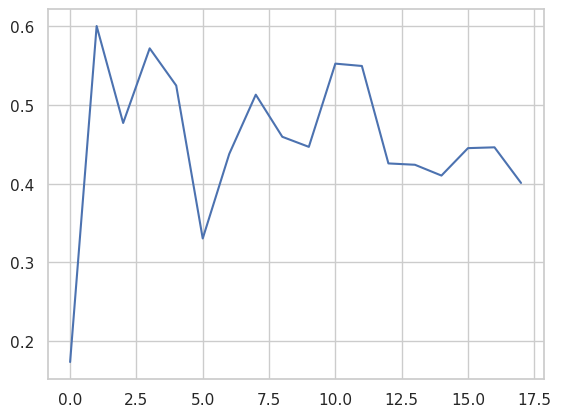

In [ ]:
plt.plot([r[1] for r in rs])
plt.show()

In [95]:
# Giang oi voice
# val_set
from torch.nn import functional as F

ckpt = torch.load("/home2/havt/emotion_intensity/rank_model_60.pt", map_location=device)
model.load_state_dict(ckpt['state_dict'])
model.to(device)
model.eval()

out = {"id": [], "speaker": [], "emotion": [], "lb": [],  "intensity": []}
for sample in val_set:
    # if sample["speaker"] == 0:
    idx = sample["id"]
    mel = sample["mel"]
    mels = torch.from_numpy(mel).unsqueeze(0)
    mels = mels.to(device)
    
    i, h, r = model(mels)
    emo_pred = torch.argmax(h, dim=1).item()
    emo_inten = F.sigmoid(r).item()
    
    out["speaker"].append(sample["speaker"])
    out["lb"].append(sample["emotion2id"])
    out["emotion"].append(emo_pred)
    out["intensity"].append(emo_inten)
    out["id"].append(idx)

In [96]:
import pandas as pd

df = pd.DataFrame(out)

id2emo = ['neutral', 'happy', 'sad', 'angry', 'surprise']
df['emotion_name'] = df['emotion'].map(lambda x: id2emo[x])
df['lb_name'] = df['lb'].map(lambda x: id2emo[x])
df['speaker'] = df['speaker'].map(lambda x: "neu" if x == 0 else "emo")

# sort by intensity
df = df.sort_values(by=['intensity'], ascending=True)
df.head(5)

,id,speaker,emotion,lb,intensity,emotion_name,lb_name
414,006429,neu,0,0,0.289791,neutral,neutral
848,003735,emo,0,0,0.330023,neutral,neutral
63,005652,neu,0,0,0.330962,neutral,neutral
966,001488,emo,0,0,0.332293,neutral,neutral
473,007259,neu,0,0,0.335593,neutral,neutral


In [103]:
# # # concat 2 df
# # _train_df = df[['id', 'speaker', 'emotion_name', 'lb_name', 'intensity']]
# _train_df.columns = ['id', 'speaker', 'emotion_label', 'emotion_pred', 'intensity']
# # _val_df = df[['id', 'speaker', 'emotion_name', 'lb_name', 'intensity']]
# _val_df.columns = ['id', 'speaker', 'emotion_label', 'emotion_pred', 'intensity']
# concat_df = pd.concat([_train_df, _val_df], axis=0)
# # len(concat_df)
# concat_df.to_csv("vlsp2023_intensity_mix60.csv", index=False)

In [76]:
df = df.sort_values(by=['intensity'], ascending=False)
df.head(5)

,id,emotion,lb,intensity,emotion_name,lb_name
6519,004812,2,4,0.944793,sad,surprise
9995,000888,2,0,0.930699,sad,neutral
4533,004264,3,4,0.930543,angry,surprise
5409,007157,2,0,0.928953,sad,neutral
11013,001138,2,0,0.928368,sad,neutral


In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style="whitegrid")
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="emotion_name", y="intensity", data=df)
ax = sns.swarmplot(x="emotion_name", y="intensity", data=df, color=".25")
plt.show()

/home2/havt/miniconda3/envs/vc/lib/python3.10/site-packages/seaborn/categorical.py:3398: UserWarning: 95.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home2/havt/miniconda3/envs/vc/lib/python3.10/site-packages/seaborn/categorical.py:3398: UserWarning: 55.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home2/havt/miniconda3/envs/vc/lib/python3.10/site-packages/seaborn/categorical.py:3398: UserWarning: 68.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home2/havt/miniconda3/envs/vc/lib/python3.10/site-packages/seaborn/categorical.py:3398: UserWarning: 72.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f3d50e051b0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

/home2/havt/miniconda3/envs/vc/lib/python3.10/site-packages/seaborn/categorical.py:3398: UserWarning: 50.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home2/havt/miniconda3/envs/vc/lib/python3.10/site-packages/seaborn/categorical.py:3398: UserWarning: 49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


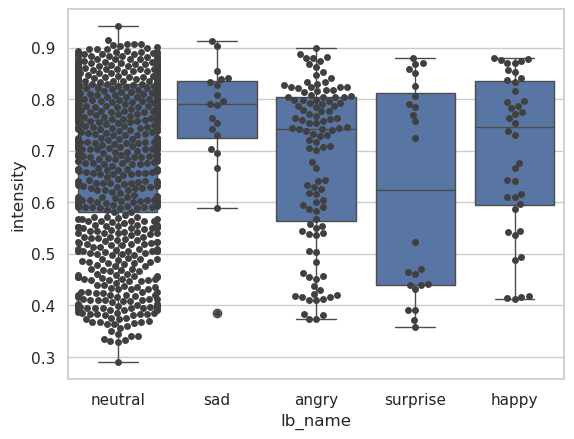

In [ ]:
sns.set_theme(style="whitegrid")
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="lb_name", y="intensity", data=df)
ax = sns.swarmplot(x="lb_name", y="intensity", data=df, color=".25")

<Axes: xlabel='emotion', ylabel='Count'>

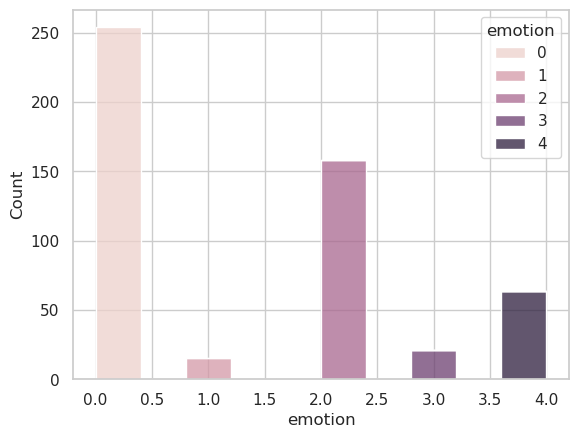

In [ ]:
sns.histplot(data=df, x="emotion", hue="emotion", multiple="stack")

<Axes: xlabel='lb', ylabel='Count'>

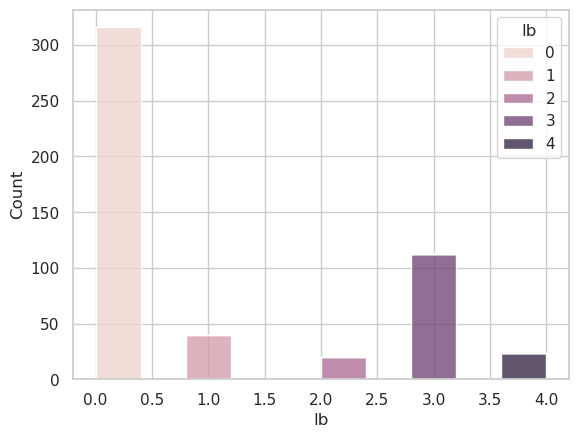

In [ ]:
sns.histplot(data=df, x="lb", hue="lb", multiple="stack")

In [ ]:
train_txt_df = pd.read_csv("/home2/havt/vlsp2023-multi-spk-dataset/train.txt", sep="|", header=None)
train_txt_df.columns = ["id", "speaker", "phone", "text", "emotion"]

In [ ]:
train_txt_df

,id,speaker,phone,text,emotion
0,5141,emo,{t oo1 iz1 b aw3 tc k o3 l a2 mc v ie6 kc nh a...,tôi bắt có làm việc nhà à,angry
1,8270,emo,{t oo1 iz1 kh oo1 ngz th ee4 d u3 pc k oo1 v i...,tôi không thể giúp cô vì anh ta ý cô là sao,neutral
2,634,emo,{th aa6 tc x uw6 l a2 k o3 r oo2 iz2},thật sự là có rồi,neutral
3,4829,emo,{l a2 mc t oo1 iz1 nh ow3 l a6 iz6 i1 ch a1 ng...,làm tôi nhớ lại y chang như ngày xưa,neutral
4,3363,emo,{th oo1 iz1 h ee3 tc m uo3 nc aw1 nc r oo2 iz2},thôi hết muốn ăn rồi,sad
...,...,...,...,...,...
11735,762,neu,{t uw2 ph ie3 m oo6 tc tr o1 ngz h a1 iz1 ng w...,từ phía một trong hai người,neutral
11736,1480,neu,{th ee3 th i2 t wa1 ngz t uw6 nh uw1 v aa6 iz6},thế thì tương tự như vậy,neutral
11737,2280,neu,{th i2 l a3 m i2 nhz l aa3 iz3 k a3 iz3 n a2 o...,thì lá mình lấy cái nào mình chỉ còn kéo ra ở ...,neutral
11738,1795,neu,{t a6 iz6 v i2 m i2 nhz k aa2 nc m oo6 tc k a3...,tại vì mình cần một cái lượng nước chính xác k...,neutral


,id,emotion,lb,intensity,emotion_name,lb_name
4922,005157,0,2,0.305930,neutral,sad
1803,005686,0,0,0.304663,neutral,neutral
1124,005860,0,2,0.304317,neutral,sad
3716,007837,0,0,0.295305,neutral,neutral
10609,004082,0,0,0.288206,neutral,neutral
11439,004805,0,0,0.286610,neutral,neutral
3960,005574,0,2,0.286444,neutral,sad
4515,005033,0,0,0.282909,neutral,neutral
2156,003582,0,2,0.282776,neutral,sad
3522,005534,0,2,0.276791,neutral,sad
